### Step 1: Load the libraries

In [4]:
# Import the `pandas` library to load the dataset
import pandas as pd
# Import numpy to explore the dataset
import numpy as np

In [5]:
import matplotlib.pyplot as plt
# Import the plotting library
from pandas.plotting import andrews_curves

In [6]:
from sklearn.metrics import accuracy_score, precision_score

In [7]:
from sklearn.ensemble import RandomForestClassifier

### Step 2: Load the Iris data

In [8]:
# Read dataset from the file
iris_file = pd.read_csv("data/iris.csv")
iris_file.dtypes

SepalLength    float64
SepalWidth     float64
PetalLength    float64
PetalWidth     float64
Name            object
dtype: object

In [9]:
print(iris_file.head())

   SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa


### Step 3: Examine the data (and clean if necessary)

In [10]:
# Let's describe the dataset
print(iris_file.describe().T)

             count      mean       std  min  25%   50%  75%  max
SepalLength  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
SepalWidth   150.0  3.054000  0.433594  2.0  2.8  3.00  3.3  4.4
PetalLength  150.0  3.758667  1.764420  1.0  1.6  4.35  5.1  6.9
PetalWidth   150.0  1.198667  0.763161  0.1  0.3  1.30  1.8  2.5


In [11]:
# Let's check for any empty data
np.where(pd.isnull(iris_file))

(array([], dtype=int64), array([], dtype=int64))

The data set doesn't have any empty values.

In [12]:
# Let's check how many varieties of iris we have
iris_file.groupby('Name').size()

Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

There are 50 records for each category Setosa, Versicolor and Virginica. 

We have 3 classes as expected and they are evenly balanced.

There are not empty cells, so our dataset is ready to further steps.

### Step 4: Prepare out dataset for our analysis

We will need to split our dataset to create:

A. Feature dataset
- This will be the data we will use to train our model.
- This data will give indications for future predictions.

B. Target dataset
- Targets are the data that we'll search for answers, in this case are the classes of flowers

In [13]:
# Let's extract out features values from the data set

iris_data_feature_data = iris_file[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
print(iris_data_feature_data)

     SepalLength  SepalWidth  PetalLength  PetalWidth
0            5.1         3.5          1.4         0.2
1            4.9         3.0          1.4         0.2
2            4.7         3.2          1.3         0.2
3            4.6         3.1          1.5         0.2
4            5.0         3.6          1.4         0.2
..           ...         ...          ...         ...
145          6.7         3.0          5.2         2.3
146          6.3         2.5          5.0         1.9
147          6.5         3.0          5.2         2.0
148          6.2         3.4          5.4         2.3
149          5.9         3.0          5.1         1.8

[150 rows x 4 columns]


In [14]:
# Let's create our target value dataset
iris_data_feature_target = iris_file[['Name']]
print(iris_data_feature_target)

               Name
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-virginica

[150 rows x 1 columns]


### Step 5: Use a Python library (Scikit-learn) to create a KNN model using the data set

In [15]:
# Let's call X the feature data and y the target value

X = iris_data_feature_data
y = iris_data_feature_target

In [16]:
# Then we use the KNN classifier provided by Scikit-learn
from sklearn.neighbors import KNeighborsClassifier

In [17]:

# We create a new classifier model (called knn) that will analyse our data using a k=4 as the number of features
knn = KNeighborsClassifier(n_neighbors=4)


In [18]:

# We fit the model to our data - this is where the model learns from the data
knn.fit(X,y)

/Users/luca/Documents/01_Scripting/iris-prediction/iris-pred-venv/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

### Step 6: Use the KNN model to make predictions

In [19]:
# row 4: 5.0, 3.6, 1.4, 0.2 = Iris-setosa

# Let's predict the class of the row 4
predicted_class = knn.predict([[5.0, 3.6, 1.4, 0.2]])
print(predicted_class)

['Iris-setosa']


/Users/luca/Documents/01_Scripting/iris-prediction/iris-pred-venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


The prediction matches the expected output for row 4

In [20]:
# row 74: 6.4, 2.9, 4.3, 1.3 = Iris-versicolor
# Let's predict the class of the row 74
predicted_class = knn.predict([[6.4, 2.9, 4.3, 1.3]])
print(predicted_class)

['Iris-versicolor']


/Users/luca/Documents/01_Scripting/iris-prediction/iris-pred-venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


The prediction matches the expected output for row 74

In [21]:
# row 149: 5.9, 3.0, 5.1, 1.8 = Iris-virginica
# Let's predict the class of the row 149
predicted_class = knn.predict([[5.9, 3.0, 5.1, 1.8]])
print(predicted_class)


['Iris-virginica']


/Users/luca/Documents/01_Scripting/iris-prediction/iris-pred-venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


The prediction matches the expected output for row 149

In [22]:
### Step 7: Plot diagrams to examine results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

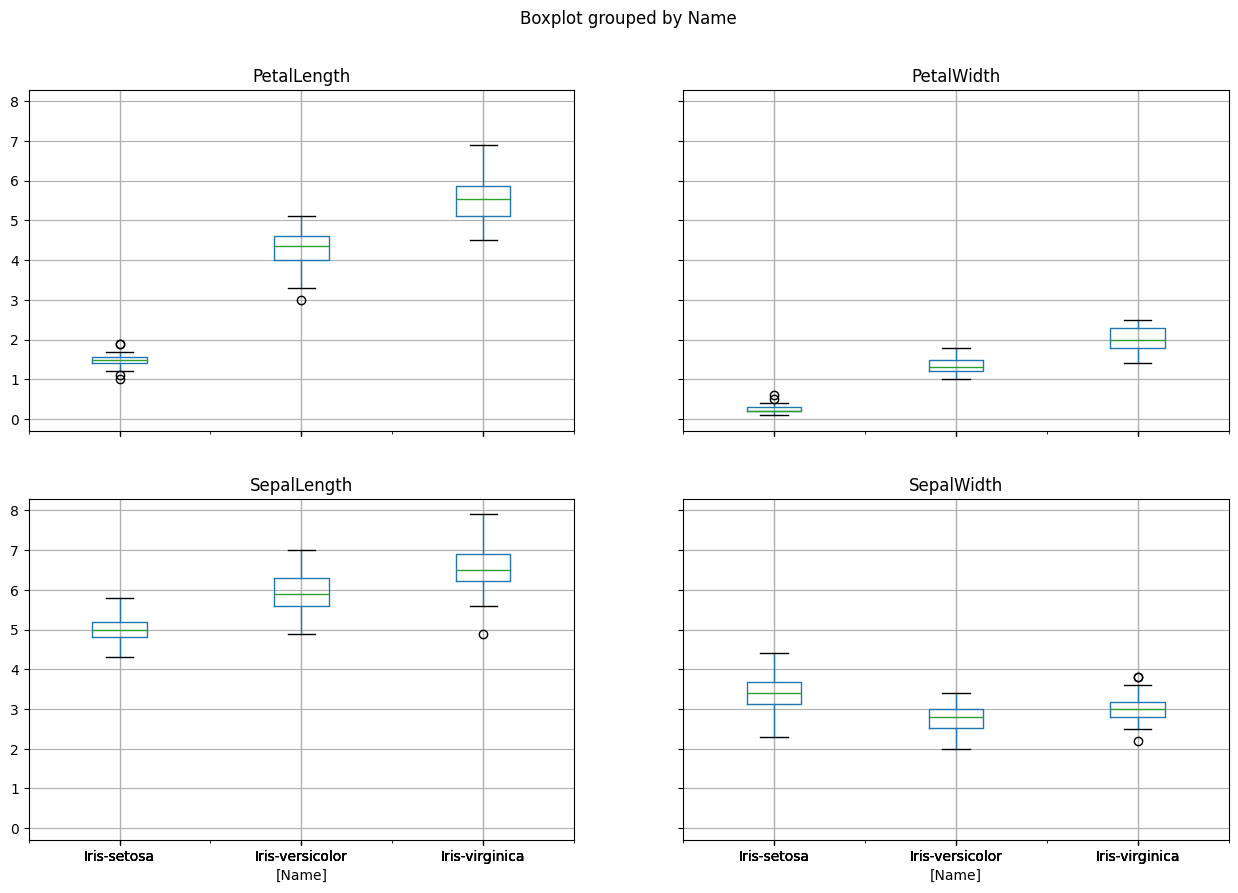

In [23]:
plt.figure()
iris_file.boxplot(by='Name', figsize=(15, 10))
plt.show

Petal Lengths for the three classes are well separated.
Petal Widths for the three classes are well separated.
Petal Lengths and Petal Widths are the best features to use for classification.
Sepal Lengths and Sepal Widths are not good features to use for classification.


Let's use Andrews Curves to visualize the data.

Andrews curves are a way to visualize high-dimensional data (data with many features) by turning each row of your dataset into a smooth, wavy line (like a wave or a squiggle). The idea is to show patterns and groupings in the data using curves instead of scatter plots.

📊 Why use them?
They're especially useful when:

You have many features/columns, and

You want to see how different classes (or labels) are grouped or separated.

For example, in the Iris dataset, you could use Andrews curves to see how the 3 flower species are visually distinct based on their measurements.

🔧 How does it work?
Each row of the dataset is turned into a mathematical function (using sine and cosine), and this function becomes a curve on a graph. The shape of each curve depends on the values in that row.

Think of it like this:

One curve = one data point (e.g., one flower)

The shape of the curve = the features of that flower

The color of the curve = the class/label (e.g., species)

🧠 What’s the point?
If certain types of data (like certain species of flowers) make curves that look similar or group together, then it means those types are distinct in a meaningful way. It helps you spot clusters, outliers, or overlaps between groups.

🌼 Example (Iris dataset):
If you plot Andrews curves for the Iris dataset:

You’ll see that Iris Setosa curves look very different and cluster nicely.

Iris Versicolor and Iris Virginica curves might overlap more.

That tells you how well-separated the classes are based on their features.



<Axes: >

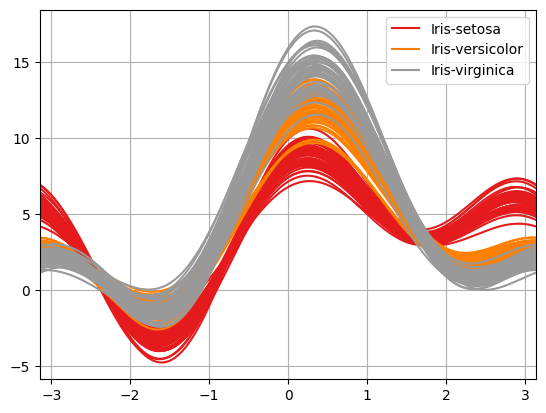

In [24]:
andrews_curves(iris_file, "Name", colormap=plt.get_cmap("Set1"))

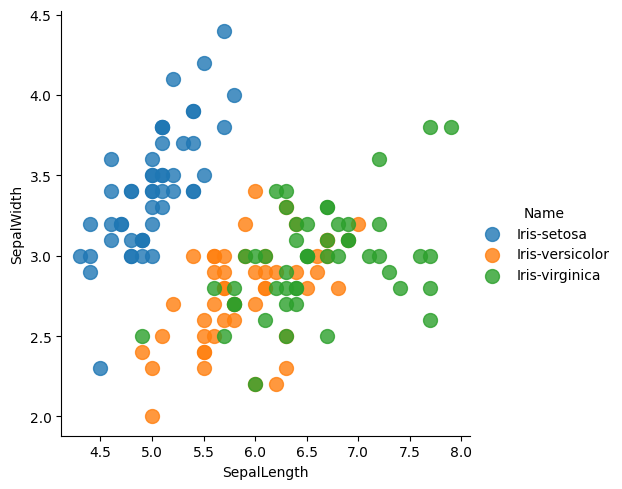

In [25]:
# Let's plot the data across the SepalLength and SepalWidth
sns.lmplot(x='SepalLength', y='SepalWidth', data=iris_file, fit_reg=False, hue='Name', height=5, scatter_kws={"s": 100}) 

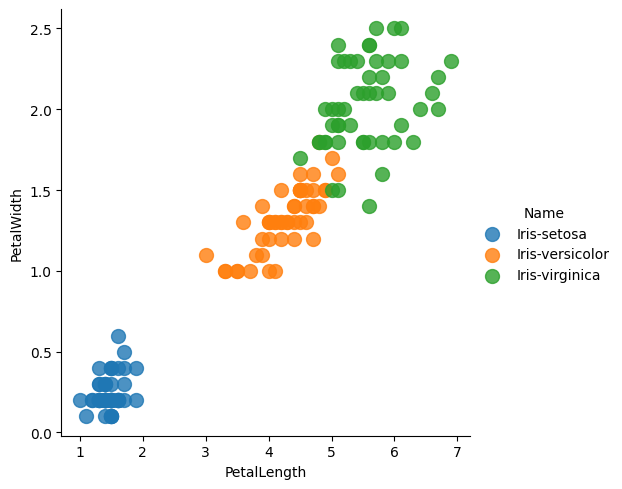

In [26]:
# Let's plot the data across the PetalLength and PetalWidth
sns.lmplot(x='PetalLength', y='PetalWidth', data=iris_file, fit_reg=False, hue='Name', height=5, scatter_kws={"s": 100}) 

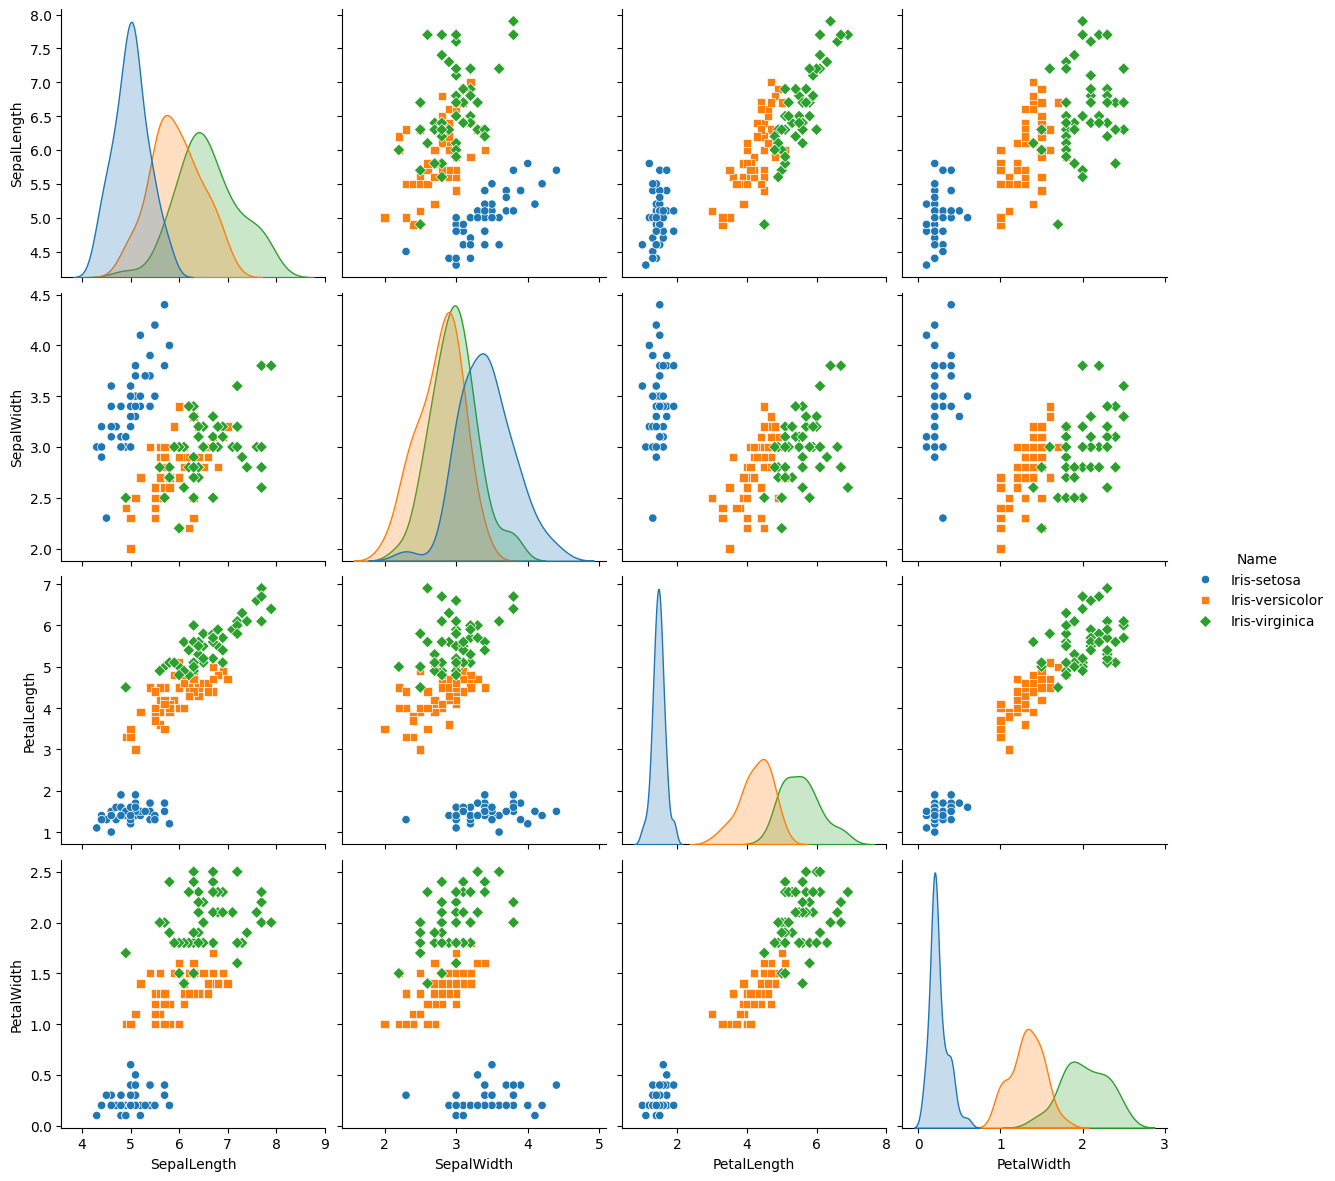

In [27]:
# Let's plot the data using a pairplot.
# Pairplot is a very useful way to compare overalapping values, the distributions demonstrate how data is overalapping for all the possible combinations of the feature data.

sns.pairplot(iris_file, hue = "Name", height=3, markers=["o", "s", "D"])
plt.show()

Conclusion: There is more overlapping for Sepal Length and Sepal Width than for Petal Length and Petal Width.
Hence we can conclude that Petal Length and Petal Width are the best features to use for classification.


Let's find out which feature between Petal Length and Petal Width is the best to use for classification.

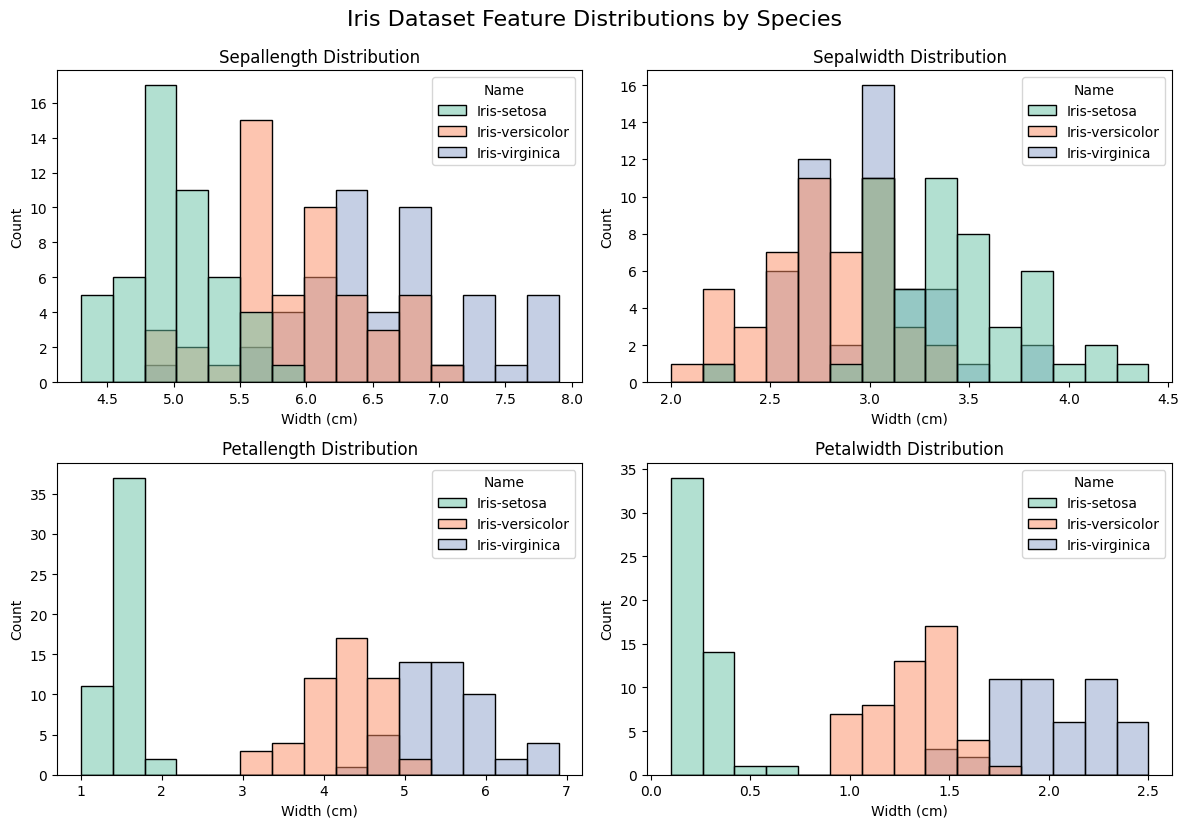

In [28]:
# Let's plot the data using Frequency Histogram

# Define the features to plot
features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

# Set up the subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# Plot histograms for each feature
for idx, feature in enumerate(features):
    ax = axes[idx]
    sns.histplot(data=iris_file, x=feature, hue='Name', multiple='layer', bins=15, ax=ax, palette='Set2')
    ax.set_title(f'{feature.replace("_", " ").title()} Distribution')
    ax.set_xlabel('Length (cm)' if 'length' in feature else 'Width (cm)')
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.suptitle('Iris Dataset Feature Distributions by Species', fontsize=16, y=1.03)
plt.show()


Conclusion:
The least overlapping areas seems to be in the Petal Width frequency histogram hence Petal Width feature has the most distinct separation between the three classes of iris flowers.

# Use linear regression to predict the feature values
#### Question: Can I predict the Sepal length of a flower using linear regression?
#### Answer: Yes! We have continuous data. We are looking for the sepal length (output) of an unknown variety given the sepal width, petal length and petal width (inputs).

### Step 1: Let us examine the relationships between LENGTHS: sepal length and petal length

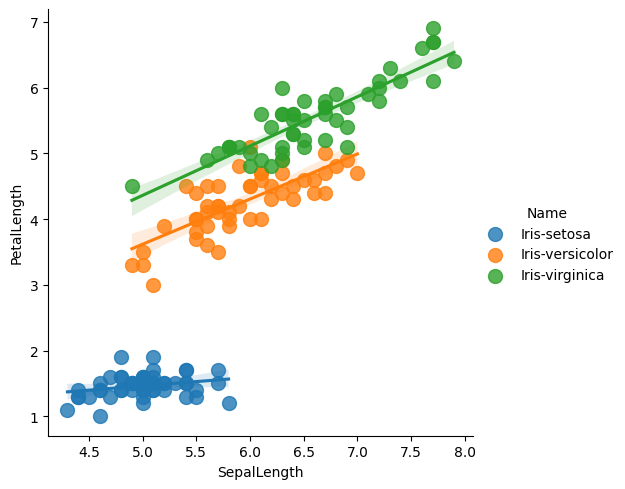

In [29]:
# Let's plot the scatterplots (with the regression line) for the feature data

sns.lmplot(x='SepalLength', y='PetalLength', data=iris_file, height=5, scatter_kws={"s": 100}, hue='Name')

Conclusion:

It looks a linear relationship across each type of flower.

There are not (so many) outliers.

Homoscedasticity looks good.

#### Step 2: Let us examine the relationships between WIDTHS: sepal width and petal width

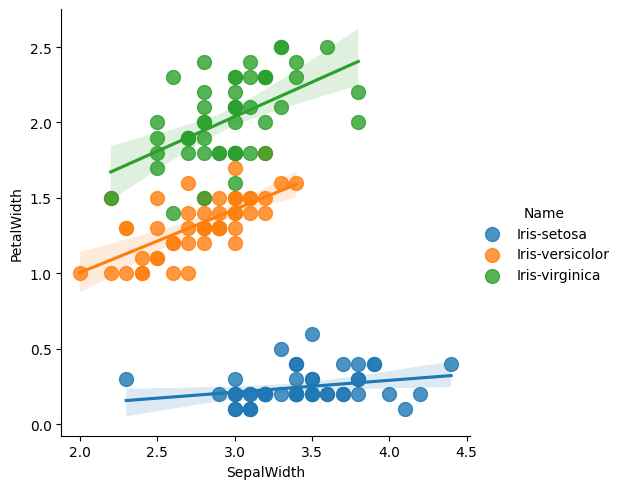

In [30]:

sns.lmplot(x='SepalWidth', y='PetalWidth', data=iris_file, height=5, scatter_kws={"s": 100}, hue='Name')

Conclusion:

It looks a linear relationship across each type of flower.

There are not (so many) outliers.

Homoscedasticity looks good.

### Step 3: Creating the independent (X) and dependent (y) variables

We will try to predict the sepal length (cm) of a flower, having the sepal width, petal length and petal width values.

This is a regression problem!

Sepal length is a continuous value (number)

In [31]:
iris_data_indipendent_data = iris_file[['SepalWidth', 'PetalLength', 'PetalWidth']]
X = iris_data_indipendent_data

iris_data_depeendent_data = iris_file[['SepalLength']]
y = iris_data_depeendent_data

In [32]:
# Let's use scikit-learn for linear regression
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X, y)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)

LinearRegression()

### Step 4: Validation

In [33]:
### Let's predict the Sepal Length of the row 10
linreg.predict([[3.7, 1.5, 0.2]])

/Users/luca/Documents/01_Scripting/iris-prediction/iris-pred-venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[5.2221393]])

Conclusion: The real value is 5.4, the predicted value is 5.2, the difference is 0.2, Not so bad!

In [34]:
### Let's predict the Sepal Length of the row 111
linreg.predict([[2.7, 5.3, 1.9]])

/Users/luca/Documents/01_Scripting/iris-prediction/iris-pred-venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[6.31294877]])

Conclusion: The real value is 6.4, the predicted value is 6.3, the difference is 0.1, Not so bad!

## Supervised Classification with the Python Scikit-learn module

**Classification with the Iris dataset from Sklearn**

In [35]:
# Let's isolate the features and the target variable

# The feature variables are the measurements of the flowers
print(iris_data_feature_data.head().T)


               0    1    2    3    4
SepalLength  5.1  4.9  4.7  4.6  5.0
SepalWidth   3.5  3.0  3.2  3.1  3.6
PetalLength  1.4  1.4  1.3  1.5  1.4
PetalWidth   0.2  0.2  0.2  0.2  0.2


In [36]:
# Let's isolate our target value dataset
iris_data_feature_target = iris_file[['Name']]
print(iris_data_feature_target)

               Name
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-virginica

[150 rows x 1 columns]


In [37]:
# Let's convert the target value from string classification into a series of number using LabelEncoder

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# We convert the target value into a series of numbers
iris_data_feature_target['Name'] = label_encoder.fit_transform(iris_data_feature_target['Name'])
print(iris_data_feature_target['Name'])

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Name, Length: 150, dtype: int64


/var/folders/l1/j74c0f2s2273qr62tb9_bv1w0000gn/T/ipykernel_57841/2143863842.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_data_feature_target['Name'] = label_encoder.fit_transform(iris_data_feature_target['Name'])


In [38]:
# Show the mapping between original labels and encoded values
print("Label Mapping:")
for index, class_name in enumerate(label_encoder.classes_):
    print(f"{index} : {class_name}")

Label Mapping:
0 : Iris-setosa
1 : Iris-versicolor
2 : Iris-virginica


In [39]:
print(iris_data_feature_target.head())

   Name
0     0
1     0
2     0
3     0
4     0


#### Check predictors X variable names and data size

In [40]:
# Let's rename the feature data frame
iris_df = iris_file[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
iris_df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [41]:
print(f"Predictors X variable names: {iris_df.columns}")
print(f"X data size: {iris_df.shape}")

Predictors X variable names: Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'], dtype='object')
X data size: (150, 4)


#### Check the type of X , Y data

X is a pandas.DataFrame and Y is a pandas.Series.
These are the core data structures of pandas package.

In [42]:
print(f"Type of X data: {type(iris_df)}")
print(f"Type of Y data: {type(iris_data_feature_target)}")

Type of X data: <class 'pandas.core.frame.DataFrame'>
Type of Y data: <class 'pandas.core.frame.DataFrame'>


In [43]:
# Let's convert iris_data_feature_target from a dataframe to a Series
iris_y = iris_data_feature_target.squeeze()
print(f"Type of Y data: {type(iris_y)}")

Type of Y data: <class 'pandas.core.series.Series'>


In [44]:
print(iris_y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Name, Length: 150, dtype: int64


#### Check class distribution of Y

In [45]:
iris_y.value_counts()

Name
0    50
1    50
2    50
Name: count, dtype: int64

There are 50 records for each category Setosa, Versicolor and Virginica. 

We have 3 classes as expected and they are evenly balanced.

There are not empty cells, so our dataset is ready to further steps.

#### Use ``train_test_split`` to prepare your train and test data
Package documentation: [sklearn train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [46]:
from sklearn.model_selection import train_test_split

iris_x_train, iris_x_test, iris_y_train, iris_y_test = train_test_split(
    iris_df,
    iris_y,
    random_state=0,
    stratify=iris_y
    )

stratify=iris_y makes sure:

The same class balance is kept in both train and test sets.

No class is accidentally left out or over-represented.

You get fair and meaningful training and evaluation.

train_test_split() has a default value for the test_size parameter.

💡 By default, test_size=0.25

That means:

75% of the data goes to training

25% goes to testing

So even if you don’t write test_size=0.25, it’s still using that value under the hood.



#### Use `StandardScaler` from sklearn to standardize the predictors.

Package documentation: [sklearn StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

Otherwise, once `StandardScaler` has been imported, use `help(StandardScaler)` to print its documentation.

You can use `help` Python command to check the documentation of any function or class.

When you're building a machine learning model, you often work with multiple predictors (a.k.a. features or input variables). These features can be on very different scales.

For example:

One feature could be age (ranges from 0 to 100).

Another could be income (ranges from $0 to $100,000).

Another might be a test score (ranges from 0 to 1).

If you feed these into some machine learning models without standardizing, the models can get confused because they give more importance to features with bigger numbers—not because those features are more important, but just because of the scale.

StandardScaler fixes that by making all features have:

A mean of 0

A standard deviation of 1

This helps many models perform better, especially ones like:

Linear Regression

Logistic Regression

SVM

KNN

PCA



In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_x_train = scaler.fit_transform(iris_x_train)
iris_x_test = scaler.transform(iris_x_test)

#### Check class distribution in training and test Y.

In [48]:
print(f"Training Y class count: \n{iris_y_train.value_counts()}")
print(f"Test Y class count: \n{iris_y_test.value_counts()}")

Training Y class count: 
Name
2    38
1    37
0    37
Name: count, dtype: int64
Test Y class count: 
Name
0    13
1    13
2    12
Name: count, dtype: int64


#### Check the dimensions of training and test X by the `shape` function.

In [49]:
print(iris_x_train.shape)
print(iris_x_test.shape)


(112, 4)
(38, 4)


### Classify with K-nn

#### Fit K-nn model with neighbors=5

In [50]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(iris_x_train, iris_y_train)

KNeighborsClassifier()

#### Calculate K-nn training and test data accuracy

In [51]:
knn_train_accuracy = knn_classifier.score(iris_x_train, iris_y_train)
knn_test_accuracy = knn_classifier.score(iris_x_test, iris_y_test)

print(f"K-nn training data accuracy: {round(knn_train_accuracy, 3)}")
print(f"K-nn test data accuracy: {round(knn_test_accuracy, 3)}")

K-nn training data accuracy: 0.973
K-nn test data accuracy: 0.974


#### Use Grid Search and Cross Validation to find the best number of neighbors

The default option of 5-fold cross validation is used.
GridSearchCV documentation: [sklearn GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [52]:
# Define parameter grid
num_neighbors = np.array([1, 3, 5, 8, 10, 15, 20, 25, 30])

param_grid = dict(n_neighbors=num_neighbors)

param_grid

{'n_neighbors': array([ 1,  3,  5,  8, 10, 15, 20, 25, 30])}

In [53]:
from sklearn.model_selection import GridSearchCV

# Initialize model
knn_model = KNeighborsClassifier()

grid = GridSearchCV(
    estimator=knn_model,
    param_grid=param_grid,
    scoring="accuracy"
    )

# Run grid search
grid.fit(iris_x_train, iris_y_train)
best_n = grid.best_estimator_.n_neighbors
best_score = round(grid.best_score_, 3)

print(f"Best number of neighbors: {best_n}")
print(f"Best achieved average test accuracy for {best_n} neighbors: {best_score}")

Best number of neighbors: 8
Best achieved average test accuracy for 8 neighbors: 0.938


In [54]:
knn_best = grid.best_estimator_
test_accuracy = knn_best.score(iris_x_test, iris_y_test)
print(f"Test accuracy for {best_n} neighbors: {round(test_accuracy, 3)}")

Test accuracy for 8 neighbors: 0.974


In [55]:
# Predict on test set
iris_y_pred = knn_best.predict(iris_x_test)


In [56]:
iris_y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 0, 1, 1, 1,
       1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 2, 0, 1, 2, 2])

In [57]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(iris_y_test, iris_y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[13  0  0]
 [ 0 13  0]
 [ 0  1 11]]


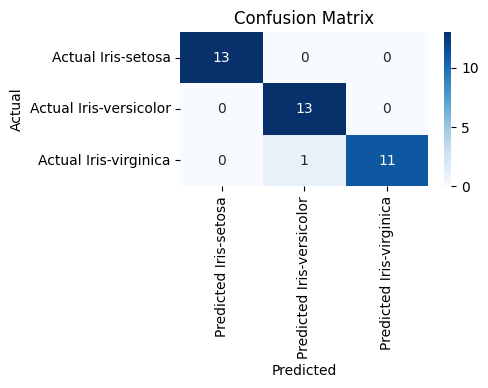

In [58]:
# Label Mapping:
# 0 : Iris-setosa
# 1 : Iris-versicolor
# 2 : Iris-virginica


# Create confusion matrix
cm = confusion_matrix(iris_y_test, iris_y_pred)

plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Iris-setosa', 'Predicted Iris-versicolor', 'Predicted Iris-virginica'], yticklabels=['Actual Iris-setosa', 'Actual Iris-versicolor', 'Actual Iris-virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [59]:
# Let's evaluate accuracy
accuracy = accuracy_score(iris_y_test, iris_y_pred)
print(f"Test Accuracy: {round(accuracy, 3)}")

Test Accuracy: 0.974


In [60]:
# Let's evaluate precision
precision = precision_score(iris_y_test, iris_y_pred, average='weighted')
print(f"Test Precision: {round(accuracy, 3)}")

Test Precision: 0.974


## Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

lrg_classifier = LogisticRegression()
lrg_classifier.fit(iris_x_train, iris_y_train) 

LogisticRegression()

In [62]:
lrg_train_accuracy = lrg_classifier.score(iris_x_train, iris_y_train)

lrg_test_accuracy = lrg_classifier.score(iris_x_test, iris_y_test)

print(f"Logistic Regression training data accuracy: {round(lrg_train_accuracy, 3)}")

print(f"Logistic Regression test data accuracy: {round(lrg_test_accuracy, 3)}")

Logistic Regression training data accuracy: 0.955
Logistic Regression test data accuracy: 0.974


In [63]:
# Let's make predictions
iris_y_pred = lrg_classifier.predict(iris_x_test)

In [64]:
iris_y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 0, 1, 2, 1,
       1, 0, 1, 0, 0, 1, 2, 1, 0, 1, 2, 2, 0, 1, 2, 2])

In [65]:
# Evaluate accuracy
accuracy = accuracy_score(iris_y_test, iris_y_pred)
print(f"Test Accuracy: {round(accuracy, 3)}")

Test Accuracy: 0.974


In [66]:
# Let's evaluate precision
precision = precision_score(iris_y_test, iris_y_pred, average='weighted')
print(f'Test Precision: {round(precision, 3)}')

Test Precision: 0.976


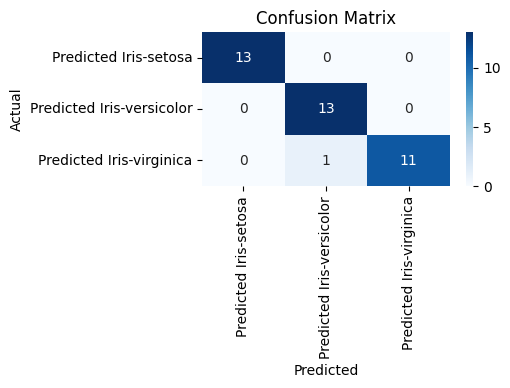

In [67]:
# Let's create confusion matrix
cm = confusion_matrix(iris_y_test, iris_y_pred)

plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Iris-setosa', 'Predicted Iris-versicolor', 'Predicted Iris-virginica'], yticklabels=['Predicted Iris-setosa', 'Predicted Iris-versicolor', 'Predicted Iris-virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

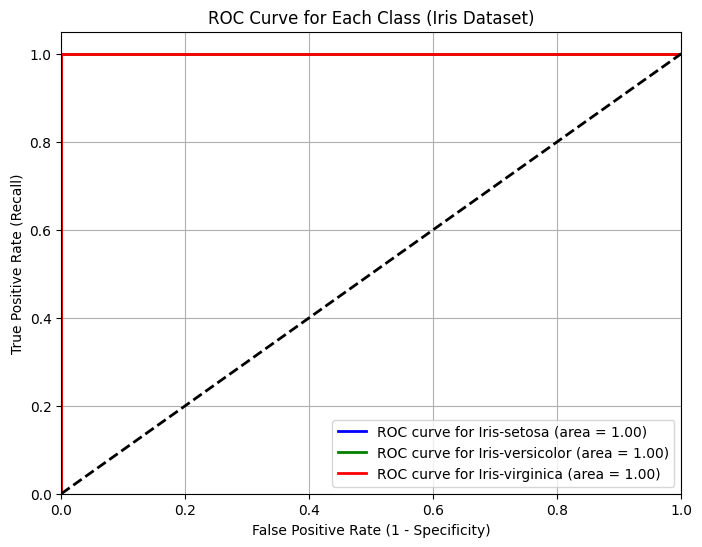

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the output labels
iris_y_test_bin = label_binarize(iris_y_test, classes=[0, 1, 2])
n_classes = iris_y_test_bin.shape[1]

# Predict probability scores
y_score = lrg_classifier.predict_proba(iris_x_test)

# Initialize dictionaries to store fpr, tpr, and roc_auc for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(iris_y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve for {class_names[i]} (area = {roc_auc[i]:0.2f})')

# Plot diagonal
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve for Each Class (Iris Dataset)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


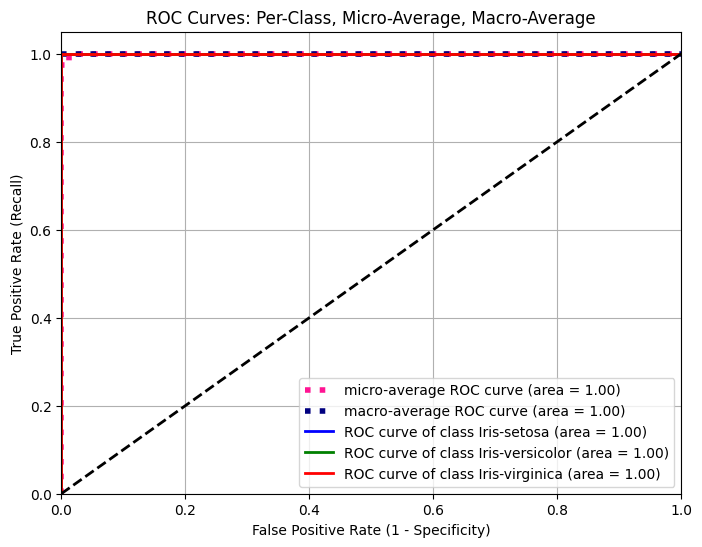

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the output
iris_y_test_bin = label_binarize(iris_y_test, classes=[0, 1, 2])
n_classes = iris_y_test_bin.shape[1]

# Predict probability scores
y_score = lrg_classifier.predict_proba(iris_x_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(iris_y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(iris_y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
# 1. Aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# 2. Then interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# 3. Average it
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(8, 6))

# Plot micro-average ROC
plt.plot(fpr["micro"], tpr["micro"],
         label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})',
         color='deeppink', linestyle=':', linewidth=4)

# Plot macro-average ROC
plt.plot(fpr["macro"], tpr["macro"],
         label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})',
         color='navy', linestyle=':', linewidth=4)

# Plot ROC for each class
colors = ['blue', 'green', 'red']
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:0.2f})')

# Plot diagonal
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Format plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curves: Per-Class, Micro-Average, Macro-Average')
plt.legend(loc="lower right")
plt.grid()
plt.show()


## XGBoost Classification

XGBoost is a powerful machine learning algorithm that makes predictions by combining a bunch of small decision trees, each one improving on the mistakes of the last.

Think of it like this:

Instead of building one big, perfect decision tree, XGBoost builds lots of small, quick ones — and each one learns from the errors the previous ones made.

This is called "boosting" — it’s a way to turn weak models into a strong one by working together.

🚀 Why use it?
It’s fast

It often gives very accurate results

It handles missing values and outliers well

Works for both classification and regression

🧪 In classification:
XGBoost predicts a class label, like "setosa" or "virginica" in the Iris dataset.

It works great for both binary (yes/no) and multi-class (like 3+ categories) problems.

✅ Example use case:
You give it flower measurements, and it learns to predict which species it is — by learning patterns from many small trees.



In [70]:
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

In [71]:
# Initialize XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_model.fit(iris_x_train, iris_y_train)

# Predict on test data
iris_y_pred = xgb_model.predict(iris_x_test)


/Users/luca/Documents/01_Scripting/iris-prediction/iris-pred-venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:49:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [72]:
# Evaluate accuracy
accuracy = accuracy_score(iris_y_test, iris_y_pred)
print(f"Test Accuracy: {round(accuracy, 3)}")


Test Accuracy: 0.947


In [73]:
# Let's evaluate precision
precision = precision_score(iris_y_test, iris_y_pred, average='weighted')
print(f'Test Precision: {round(precision, 3)}')

Test Precision: 0.954


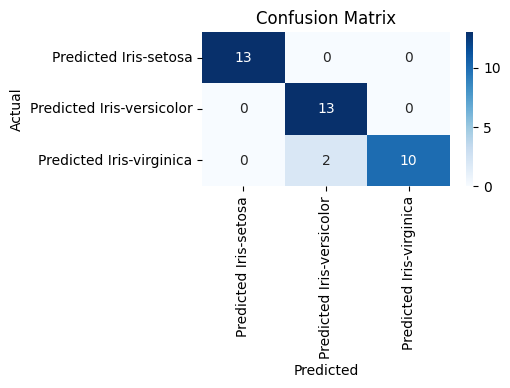

In [74]:
# Let's create confusion matrix
cm = confusion_matrix(iris_y_test, iris_y_pred)

plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Iris-setosa', 'Predicted Iris-versicolor', 'Predicted Iris-virginica'], yticklabels=['Predicted Iris-setosa', 'Predicted Iris-versicolor', 'Predicted Iris-virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Random Forest Classification

In [75]:
# Let's train a Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(iris_x_train, iris_y_train)

RandomForestClassifier()

In [76]:
# Predict on test set
iris_y_pred = clf.predict(iris_x_test)

In [77]:
# Evaluate accuracy
accuracy = accuracy_score(iris_y_test, iris_y_pred)
print(f"Test Accuracy: {round(accuracy, 3)}")

Test Accuracy: 0.974


In [78]:
# Let's evaluate precision
precision = precision_score(iris_y_test, iris_y_pred, average='weighted')
print(f'Test Precision: {round(precision, 3)}')

Test Precision: 0.976


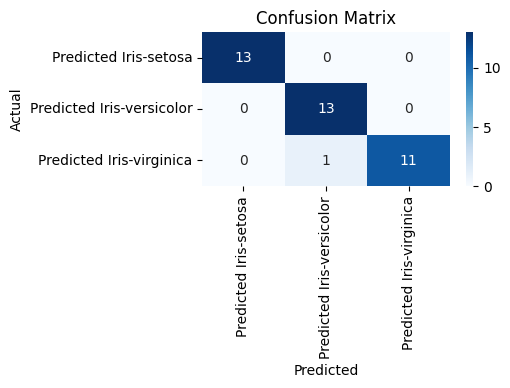

In [79]:
# Let's create confusion matrix
cm = confusion_matrix(iris_y_test, iris_y_pred)

plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Iris-setosa', 'Predicted Iris-versicolor', 'Predicted Iris-virginica'], yticklabels=['Predicted Iris-setosa', 'Predicted Iris-versicolor', 'Predicted Iris-virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Support Vector Machine (SVM) Classification

A Support Vector Machine tries to draw the best line (or boundary) that separates different categories in your data.

Imagine you have two types of points on a graph — red dots and blue dots. SVM finds the line (or curve) that splits them as clearly as possible, with the biggest possible gap between the two groups.

📐 That gap is called the "margin", and SVM wants to:
Maximize the margin

Place the boundary right in the middle of the space between the closest points from each class (called support vectors)

🧩 It even works when the data isn’t linearly separable
If the classes aren’t easily split by a straight line, SVM can use a "kernel trick" to bend the space and draw a curved boundary in higher dimensions.

✅ Example use case:
Given flower measurements, SVM can learn to classify whether a flower is "setosa", "versicolor", or "virginica" by drawing boundaries between the groups of data.



In [80]:
# Let's perform a SVM Classifier
from sklearn.svm import SVC
# Initialize SVM classifier
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
# Train the model
svm_model.fit(iris_x_train, iris_y_train)


SVC(kernel='linear', random_state=42)

In [81]:
# Predict on test data
iris_y_pred = svm_model.predict(iris_x_test)

In [82]:
# Evaluate accuracy
accuracy = accuracy_score(iris_y_test, iris_y_pred)
print(f"Test Accuracy: {round(accuracy, 3)}")


Test Accuracy: 1.0


In [83]:

# Let's evaluate precision
precision = precision_score(iris_y_test, iris_y_pred, average='weighted')
print(f'Test Precision: {round(precision, 3)}')


Test Precision: 1.0


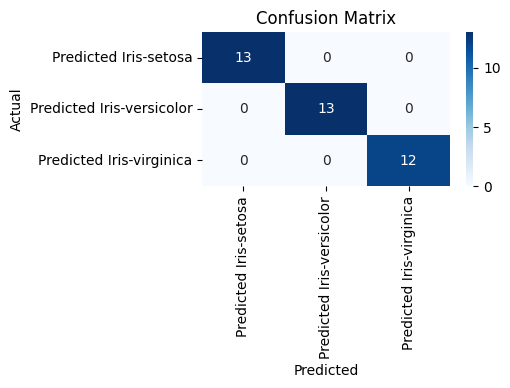

In [84]:

# Let's create confusion matrix
cm = confusion_matrix(iris_y_test, iris_y_pred)

plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Iris-setosa', 'Predicted Iris-versicolor', 'Predicted Iris-virginica'], yticklabels=['Predicted Iris-setosa', 'Predicted Iris-versicolor', 'Predicted Iris-virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Neural Network Classification

In [85]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [86]:
# Load and preprocess data
iris = load_iris()
X = iris.data
y = to_categorical(iris.target) # one-hot encoding

In [87]:
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [88]:
print(X.shape)
print(y.shape)

(150, 4)
(150, 3)


In [89]:
print (y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [90]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
y_test_labels = np.argmax(y_test, axis=1)  # For confusion matrix


In [91]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [92]:
print(X_train)

[[-1.45994639  0.36851891 -1.33892079 -1.33426404]
 [-1.69830498  0.36851891 -1.39644692 -1.33426404]
 [-0.8640499   1.76501161 -1.28139465 -1.19914869]
 [ 0.32774307 -0.09697866  0.67449393  0.82758149]
 [ 2.23461182 -1.02797379  1.82501663  1.50315822]
 [ 1.28117744  0.36851891  1.13470301  1.50315822]
 [-1.81748428 -0.09697866 -1.51149919 -1.46937939]
 [-0.26815342 -0.09697866  0.44438939  0.42223546]
 [ 1.40035674  0.36851891  0.55944166  0.28712011]
 [ 0.08938447 -0.09697866  0.7895462   0.82758149]
 [-0.14897412  3.16150431 -1.28139465 -1.06403335]
 [ 0.68528096  0.36851891  0.90459847  1.50315822]
 [-0.50651201 -0.09697866  0.44438939  0.42223546]
 [-1.22158779  0.13577012 -1.22386852 -1.33426404]
 [ 1.28117744  0.13577012  0.67449393  0.42223546]
 [-1.1024085  -1.49347136 -0.24592423 -0.25334127]
 [-0.02979482 -0.79522501  0.7895462   0.96269684]
 [ 0.56610166 -1.26072258  0.67449393  0.42223546]
 [-0.14897412 -1.02797379 -0.13087196 -0.25334127]
 [ 0.68528096 -0.32972744  0.32

In [93]:
# Define the model
model = Sequential([
    Dense(10, activation='relu', input_shape=(4,)),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')  # Softmax output: for multi-class classification (3 classes)
])

/Users/luca/Documents/01_Scripting/iris-prediction/iris-pred-venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [94]:
# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [95]:
# Train
model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=0)


In [96]:
# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9667 - loss: 0.0592
Test Accuracy: 0.97


In [97]:
# Predict classes
y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [98]:
# Confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)


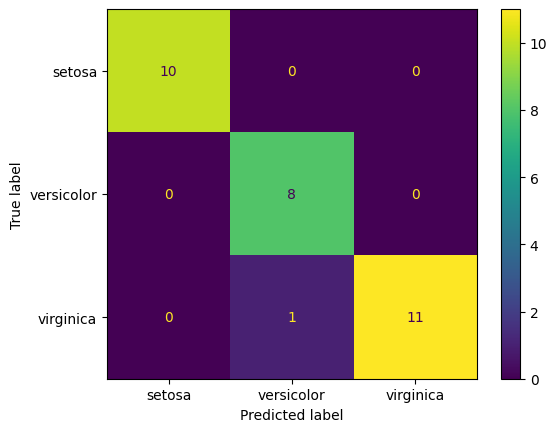

In [99]:

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()

## End of script